Download the data and unzip the contents

In [ ]:
!wget http://groups.csail.mit.edu/vision/LabelMe/NewImages/indoorCVPR_09.tar

--2021-11-28 17:06:18--  http://groups.csail.mit.edu/vision/LabelMe/NewImages/indoorCVPR_09.tar
Resolving groups.csail.mit.edu (groups.csail.mit.edu)... 128.30.2.44
Connecting to groups.csail.mit.edu (groups.csail.mit.edu)|128.30.2.44|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2592010240 (2.4G) [application/x-tar]
Saving to: ‘indoorCVPR_09.tar’

indoorCVPR_09.tar     1%[                    ]  35.28M  8.15MB/s    eta 5m 39s ^C


In [ ]:
!tar -xvf "/content/indoorCVPR_09.tar" -C "/content/"

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Move the folder from Colab local disk to a Google Drive folder.

In [ ]:
!cp -r /content/Images /content/drive/MyDrive/Datasets/limited/

Import all the necessary libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.regularizers import L2
from tensorflow.keras.initializers import HeNormal
from tensorflow import keras
from keras.layers import PReLU
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping, LearningRateScheduler
import numpy as np
import random
import os

We get a count of the number of images for each label

In [ ]:
path = "/content/drive/MyDrive/Datasets/limited/Images/"

for label in os.listdir(path):
    print(str(len(os.listdir(path + label))) + " " + label + " images")

print(str(len(os.listdir(path))))

608 airport_inside images
140 artstudio images
176 auditorium images
405 bakery images
604 bar images
197 bathroom images
662 bedroom images
380 bookstore images
213 bowling images
111 buffet images
515 casino images
112 children_room images
180 church_inside images
113 classroom images
120 cloister images
135 closet images
106 clothingstore images
114 computerroom images
103 concert_hall images
346 corridor images
258 deli images
131 dentaloffice images
274 dining_room images
101 elevator images
116 fastfood_restaurant images
103 florist images
127 gameroom images
103 garage images
101 greenhouse images
213 grocerystore images
231 gym images
239 hairsalon images
101 hospitalroom images
102 inside_bus images
457 inside_subway images
157 jewelleryshop images
127 kindergarden images
734 kitchen images
125 laboratorywet images
276 laundromat images
107 library images
706 livingroom images
101 lobby images
249 locker_room images
176 mall images
233 meeting_room images
175 movietheater imag

We write a Data Augmentation object to be applied to images for an increased dataset

In [ ]:
newdata = ImageDataGenerator(rotation_range=45,
                             zoom_range = 0.2, 
                             shear_range = 0.3,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             fill_mode='reflect',
                             horizontal_flip=True)


We apply data augmentation to the images and increase the size of our dataset 

In [ ]:
count = 0
for folder in table:
    file_list = os.listdir(path+folder)
    i = len(os.listdir(path+folder))
  
    for _ in range(i,i+301):
        if len(file_list) == 0:
            break
        else:
            file = random.choice(file_list)
            img = load_img(path+folder+"/"+file)  
            x = img_to_array(img) 
            x = x.reshape((1, ) + x.shape)  #Reshape the input image
            a = 0
            for batch in newdata.flow(x, batch_size = 1, save_to_dir=path+folder, save_prefix ='aug', save_format ='jpg'):
                a += 1
                if a == 4:
                    break
    new_i = len(os.listdir(path+folder))
    count += 1
    print(f'{folder} done with new count of {new_i}. {count}')

bookstore done with new count of 1519. 1
bowling done with new count of 1343. 2
buffet done with new count of 1241. 3
casino done with new count of 1654. 4
children_room done with new count of 1256. 5
church_inside done with new count of 1324. 6
classroom done with new count of 1247. 7
cloister done with new count of 1243. 8
closet done with new count of 1265. 9
clothingstore done with new count of 1230. 10
computerroom done with new count of 1243. 11
concert_hall done with new count of 1245. 12
corridor done with new count of 1477. 13
deli done with new count of 1400. 14
dentaloffice done with new count of 1263. 15
dining_room done with new count of 1418. 16
elevator done with new count of 1247. 17
fastfood_restaurant done with new count of 1260. 18
florist done with new count of 1237. 19
gameroom done with new count of 1262. 20
garage done with new count of 1248. 21
greenhouse done with new count of 1235. 22
grocerystore done with new count of 1359. 23
gym done with new count of 1362

Now we get the new count of images for each label after augmentation

In [5]:
for folder in os.listdir(path):
    print(str(len(os.listdir(path+folder))) + " " + folder + " images")

1732 airport_inside images
1263 artstudio images
1322 auditorium images
1541 bakery images
1748 bar images
1321 bathroom images
1805 bedroom images
1277 closet images
1247 clothingstore images
1253 computerroom images
1246 concert_hall images
1475 corridor images
1406 deli images
1260 dentaloffice images
1408 dining_room images
1242 elevator images
1255 fastfood_restaurant images
1244 florist images
1269 gameroom images
1236 garage images
1233 greenhouse images
1347 grocerystore images
1369 gym images
1385 hairsalon images
1245 hospitalroom images
1244 inside_bus images
1584 inside_subway images
1276 jewelleryshop images
1252 kindergarden images
1867 kitchen images
1252 laboratorywet images
1423 laundromat images
1238 library images
1853 livingroom images
1236 lobby images
1376 locker_room images
1318 mall images
1384 meeting_room images
1295 movietheater images
1298 museum images
1267 nursery images
1245 office images
1269 operating_room images
1526 pantry images
1294 poolinside image

We've successfully increased the number of images from 15,000 to now over 81,000 which is more than a 5x increase and each label has more than a thousand images to it. We now use the ImageDataGenerator to convert those images into tensors.

In [ ]:
i = 128
batch_size = 256

train_datagen = ImageDataGenerator(rescale=1./255,
                                   #brightness_range=[0.2,0.9], 
                                   horizontal_flip=True,
                                   #zoom_range=0.2,
                                   #shear_range=0.3,
                                   validation_split=0.3)

validation_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.3)

train_gen = train_datagen.flow_from_directory(path1,
                                              seed=91,
                                              target_size=(i,i),
                                              color_mode="rgb",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              subset='training',
                                              shuffle=True)

val_gen = validation_datagen.flow_from_directory(path1,
                                                 seed=91,
                                                 target_size=(i,i),
                                                 color_mode="rgb",
                                                 batch_size=batch_size,
                                                 class_mode='categorical',
                                                 subset='validation',
                                                 shuffle=False)

Found 64226 images belonging to 67 classes.
Found 27477 images belonging to 67 classes.


We make our model with 5 Convolutional layers and 4 fully connected layers. We also make use of Dropout, regularizer and initializer for regularization purposes.

In [ ]:
tf.random.set_seed(42)
model = Sequential()

# 1 - Convolution
model.add(Conv2D(128,(3,3), padding='valid', kernel_regularizer=L2(l2=0.01),
                 kernel_initializer='he_normal', input_shape=(128,128,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# 2nd Convolution layer
model.add(Conv2D(128,(3,3), padding='valid'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# 3rd Convolution layer
model.add(Conv2D(224,(3,3), padding='valid'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# 4th Convolution layer
model.add(Conv2D(416,(3,3), padding='valid'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# 5th Convolution layer
model.add(Conv2D(512,(3,3), padding='valid'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(320))
model.add(BatchNormalization())
model.add(PReLU(alpha_initializer=tf.initializers.constant(0.25)))
model.add(Dropout(0.5))

# Fully connected layer 2nd layer
model.add(Dense(192))
model.add(BatchNormalization())
model.add(PReLU(alpha_initializer=tf.initializers.constant(0.25)))
model.add(Dropout(0.5))

# Fully connected layer 3rd layer
model.add(Dense(160))
model.add(BatchNormalization())
model.add(PReLU(alpha_initializer=tf.initializers.constant(0.25)))
model.add(Dropout(0.5))

# Fully connected layer 4th layer
model.add(Dense(96))
model.add(BatchNormalization())
model.add(PReLU(alpha_initializer=tf.initializers.constant(0.25)))
model.add(Dropout(0.5))

model.add(Dense(67, activation='softmax'))

epochs=50
lr = 0.002
nadam = Nadam(learning_rate=lr)

model.compile(optimizer=nadam, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 126, 126, 128)     3584      
                                                                 
 batch_normalization_9 (Batc  (None, 126, 126, 128)    512       
 hNormalization)                                                 
                                                                 
 activation_5 (Activation)   (None, 126, 126, 128)     0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 63, 63, 128)      0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 63, 63, 128)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 61, 61, 128)      

In [ ]:
steps_per_epoch = train_gen.n//train_gen.batch_size
validation_steps = val_gen.n//val_gen.batch_size

"""def exp_decay(epoch, lr):
  #lrate = lr * np.exp(-decay*epoch)
  #lrate = lr * 1/1+(decay*epoch)
  if epoch%2 == 0:
    v = epoch/2
    lrate = (0.85**v) * lr
  else:
    lrate = lr
  lrate = max(lrate, 0.00001)
  return lrate

lr_rate = LearningRateScheduler(exp_decay)"""

es = EarlyStopping(monitor='val_loss', patience=3, mode='min')

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.81, patience=1, min_lr=0.0001, mode='auto')
checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_accuracy',save_weights_only=True, mode='max', verbose=1)

callbacks = [checkpoint, es, reduce_lr]

history = model.fit(x=train_gen, steps_per_epoch=steps_per_epoch, epochs=epochs, validation_data = val_gen,
                    validation_steps = validation_steps, callbacks=callbacks, max_queue_size = 80, use_multiprocessing=True, workers=80)

Epoch 1/50
250/250 [==============================] - ETA: 0s - loss: 4.9337 - accuracy: 0.0482
Epoch 00001: saving model to model_weights.h5
250/250 [==============================] - 337s 998ms/step - loss: 4.9337 - accuracy: 0.0482 - val_loss: 6.4311 - val_accuracy: 0.0145 - lr: 0.0020
Epoch 2/50
250/250 [==============================] - ETA: 0s - loss: 3.6931 - accuracy: 0.0931
Epoch 00002: saving model to model_weights.h5
250/250 [==============================] - 332s 963ms/step - loss: 3.6931 - accuracy: 0.0931 - val_loss: 5.2508 - val_accuracy: 0.0261 - lr: 0.0020
Epoch 3/50
250/250 [==============================] - ETA: 0s - loss: 3.4425 - accuracy: 0.1278
Epoch 00003: saving model to model_weights.h5
250/250 [==============================] - 329s 970ms/step - loss: 3.4425 - accuracy: 0.1278 - val_loss: 4.2066 - val_accuracy: 0.0781 - lr: 0.0020
Epoch 4/50
250/250 [==============================] - ETA: 0s - loss: 3.2712 - accuracy: 0.1544
Epoch 00004: saving model to model

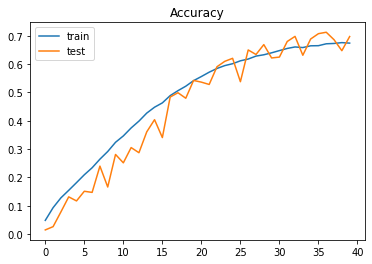

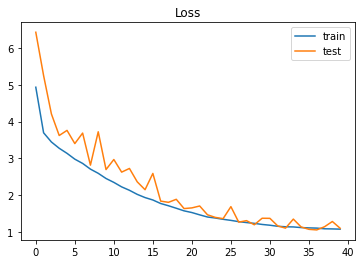

In [ ]:
from matplotlib import pyplot
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.title("Accuracy")
pyplot.legend()
pyplot.show()
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.title("Loss")
pyplot.legend()
pyplot.show()

In [ ]:
### Reserve function to check for any corrupted images if any error occurs while loading or opening
from PIL import Image
folder_path = 'data\img'
extensions = []
for fldr in os.listdir(path1):
    sub_folder_path = os.path.join(path1, fldr)
    for filee in os.listdir(sub_folder_path):
        file_path = os.path.join(sub_folder_path, filee)
        print('** Path: {}  **'.format(file_path), end="\r", flush=True)
        im = Image.open(file_path)
        gb_im = im.convert('RGB')
        if filee.split('.')[1] not in extensions:
            extensions.append(filee.split('.')[1])